In [ ]:
!pip install easyocr
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np
import imutils
import easyocr

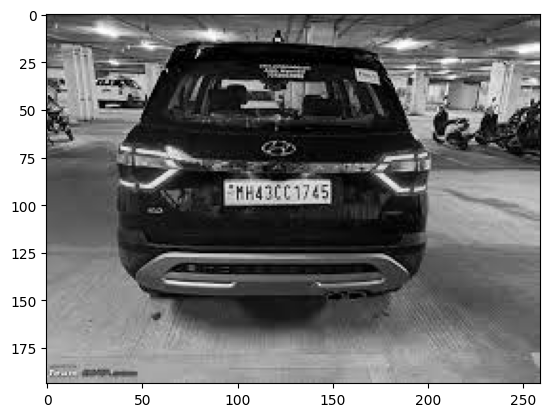

In [84]:
img = cv2.imread('/content/download.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# New Section

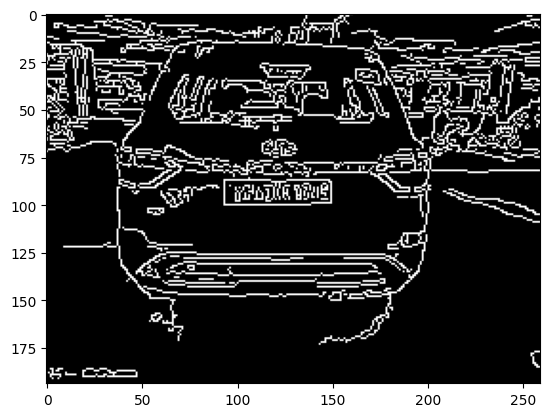

In [85]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30 , 200)
plt.imshow(cv2.cvtColor(edged , cv2.COLOR_BGR2RGB))

In [86]:
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [87]:
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 10 , True)
  if len(approx)==4:
    location = approx
    break

In [88]:
location

array([[[ 93,  87]],

       [[ 93, 100]],

       [[149,  99]],

       [[148,  87]]], dtype=int32)

In [89]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)


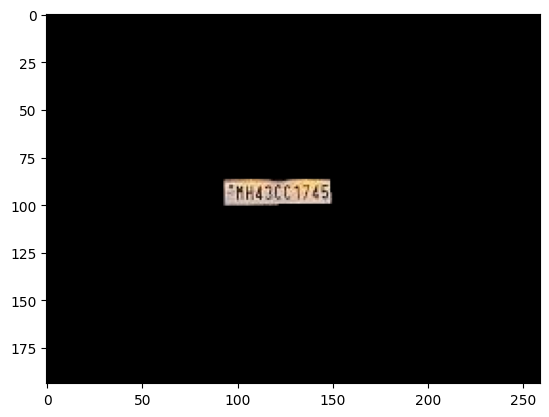

In [90]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

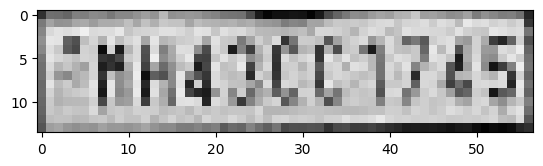

In [91]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [92]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[1, 1], [57, 1], [57, 14], [1, 14]], '"Th42cc124', 0.05949363076234853)]

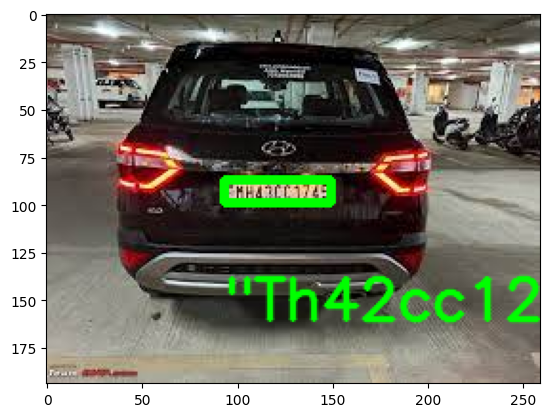

In [93]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [94]:
print(result)

[([[1, 1], [57, 1], [57, 14], [1, 14]], '"Th42cc124', 0.05949363076234853)]
